# 📉📊📈**Comparing the Performance of Various Machine Learning Models   for Sri Lanka Telecom Stock Price Prediction**📉📊📈


# ✅ **Bayesian Ridge Regression** ✅

Bayesian regression is a powerful method for dealing with limited or unevenly distributed data in linear regression. By incorporating probability distributions, it offers greater flexibility and adaptability in modeling uncertainty and variability. This makes Bayesian regression a robust approach for handling challenging data situations and improving the accuracy and reliability of regression models.

# **Import Libraries**

In [59]:
# Import Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Matplotlib and Seaborn for graphs and plottting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into the Data Frame**

In [98]:
# Import the dataset to dataset dataframe
dataset = pd.read_csv(r"..\1. dataset\TeleCom_2009_2023_Daily.csv")

# View Columns
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,46.50,48.0,48.0,46.50,9.90K,-0.53%
1,7/9/2009,46.00,47.0,47.0,45.75,17.40K,-1.08%
2,7/13/2009,45.75,46.0,47.0,45.75,22.10K,-0.54%
3,7/14/2009,45.75,45.5,46.0,45.00,20.60K,0.00%
4,7/15/2009,45.50,45.5,46.0,45.25,23.60K,-0.55%


In [99]:
#View Dataset
dataset

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,46.50,48.0,48.00,46.50,9.90K,-0.53%
1,7/9/2009,46.00,47.0,47.00,45.75,17.40K,-1.08%
2,7/13/2009,45.75,46.0,47.00,45.75,22.10K,-0.54%
3,7/14/2009,45.75,45.5,46.00,45.00,20.60K,0.00%
4,7/15/2009,45.50,45.5,46.00,45.25,23.60K,-0.55%
...,...,...,...,...,...,...,...
3234,4/4/2023,91.50,90.6,92.80,89.60,303.49K,0.66%
3235,4/6/2023,102.00,92.1,102.00,92.00,734.22K,11.48%
3236,4/10/2023,98.00,100.0,102.75,97.30,152.39K,-3.92%
3237,4/11/2023,101.50,97.9,103.50,97.30,329.43K,3.57%


# **Dataset Cleaning and Null Value Testing**

In [100]:
#Check for null values in each column
datasetdataset.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        18
Change %     0
dtype: int64

<AxesSubplot:>

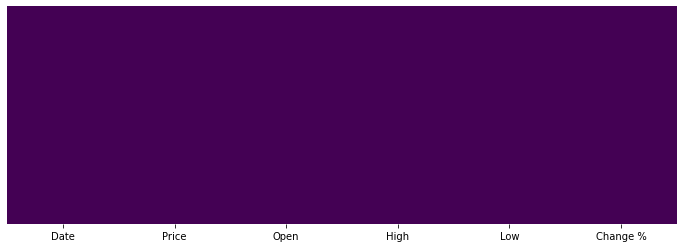

In [103]:
#Drop Vol. Comlumn
dataset = dataset.drop('Vol.', axis = 1)

#Heatmap to view null values in dataset
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')

# **Analyze the Data**

In [104]:
# see number of rows, number of columns
dataset.shape

(3239, 6)

In [105]:
#View total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  19434


In [106]:
# see columns names

dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [107]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3239 non-null   object 
 1   Price     3239 non-null   float64
 2   Open      3239 non-null   float64
 3   High      3239 non-null   float64
 4   Low       3239 non-null   float64
 5   Change %  3239 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.0+ KB


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>]], dtype=object)

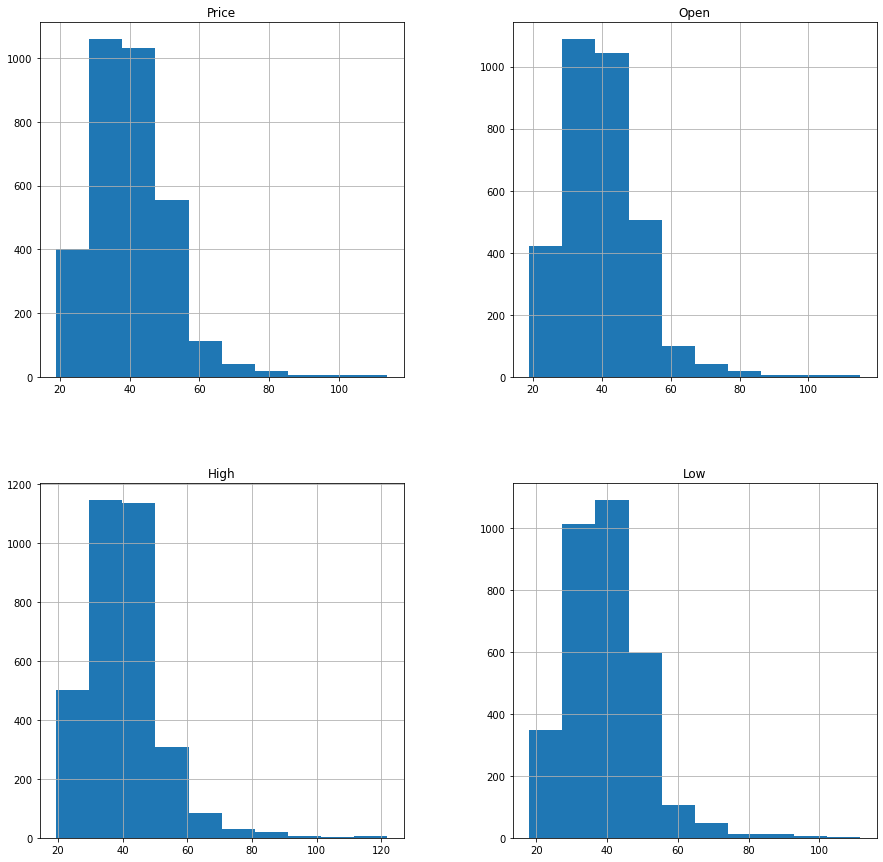

In [108]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [109]:
# The statistics per each column
dataset.describe()

,Price,Open,High,Low
count,3239.000000,3239.000000,3239.000000,3239.000000
mean,40.195088,40.184687,40.860157,39.426984
std,11.390835,11.416385,11.805006,11.034471
min,19.000000,19.000000,19.500000,18.000000
25%,32.500000,32.700000,33.000000,32.000000
50%,39.000000,39.000000,39.800000,38.500000
75%,47.000000,47.000000,47.550000,46.000000
max,113.750000,115.000000,121.750000,111.500000


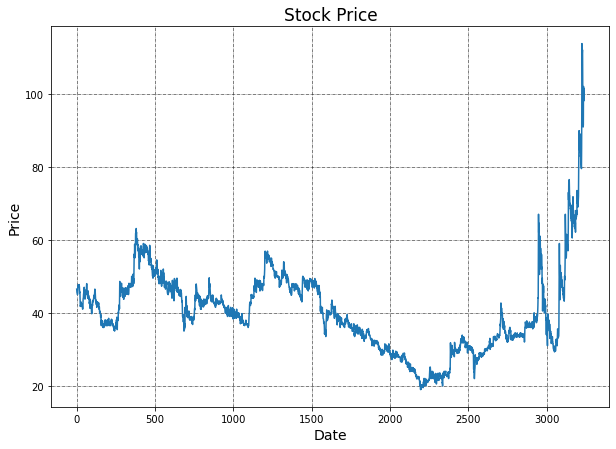

In [110]:
#Graph to display stock price data by date
dataset['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# **Define X and Y**

In [111]:
#Define x
X = dataset['Open'].values.reshape(-1,1)

#Define y
y = dataset['Price'].values.reshape(-1,1)

In [112]:
#Import BayasianRidge and Linear Regression libraries
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [113]:
model.coef_

array([0.99169388])

In [114]:
model.scores_

array([-10879.97268586,  -5335.23162131,  -5335.23162124])

# **Split Train Data and Test Data**

In [115]:
#Import train test split library
from sklearn.model_selection import train_test_split

In [116]:
#Import train test split library
from sklearn.model_selection import train_test_split

# **Dataset Traning and Model Traning**

In [117]:
#Training Model
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [118]:
#Calculating model coefficient with training dataset
model.coef_

array([0.98994909])

In [119]:
#Calculating model scores with training dataset
model.scores_

array([-8652.63310463, -4240.80435841, -4240.80435829])

# **Comparison of Actual Values and Predicted Values**

In [120]:
#Predicting with test data with trained model
y_pred = model.predict(X_test)

In [121]:
#Comparission table between Actual test data and predicted values by the trained model
df_pred = pd.DataFrame(y_test, columns=['Actual'])
df_pred['Predicted'] = y_pred
df_pred = df_pred.reset_index()
df_pred

,index,Actual,Predicted
0,0,23.90,23.676701
1,1,41.25,41.990759
2,2,52.00,52.682210
3,3,45.60,46.445530
4,4,41.75,41.990759
...,...,...,...
643,643,39.70,39.911866
644,644,47.90,47.930454
645,645,36.00,36.843024
646,646,28.90,29.121421


<AxesSubplot:>

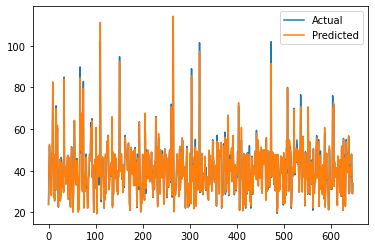

In [122]:
#Comparission graph between Actual test data and predicted values by the trained model
df_pred[['Actual', 'Predicted']].plot()

# **Accuracy and Loss Function Values of the Model**

In [123]:
#Calculating error metrics to analyse model performance
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean_Absolute_Error(MAE): 0.7552703501463827
Mean_Squared_Error(MSE): 1.709689546106186
Root_Mean_Squared_Error(RMSE): 1.307550972660793


In [124]:
#Display model accuracy score
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9885539830073098
